In [2]:
# !pip install deepod

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from deepod.models.tabular import DeepSVDD

c:\Users\madalina.ciortan\AppData\Local\miniconda3\envs\europython\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

data = np.load('data/6_cardio.npz', allow_pickle=True)
X, y = data['X'], data['y']

# Model for tabular data

In [18]:
clf = DeepSVDD(device = None)
clf.fit(X, y=None)

Start Training...
ensemble size: 1
MLPnet(
  (network): Sequential(
    (0): LinearBlock(
      (linear): Linear(in_features=21, out_features=100, bias=False)
      (act_layer): ReLU()
    )
    (1): LinearBlock(
      (linear): Linear(in_features=100, out_features=50, bias=False)
      (act_layer): ReLU()
    )
    (2): LinearBlock(
      (linear): Linear(in_features=50, out_features=128, bias=False)
      (act_layer): Identity()
    )
  )
)
epoch  1, training loss: 0.508020, time: 0.1s
epoch 10, training loss: 0.024299, time: 0.1s
epoch 20, training loss: 0.011135, time: 0.1s
epoch 30, training loss: 0.006726, time: 0.0s
epoch 40, training loss: 0.005063, time: 0.0s
epoch 50, training loss: 0.003334, time: 0.0s
epoch 60, training loss: 0.002521, time: 0.1s
epoch 70, training loss: 0.002205, time: 0.1s
epoch 80, training loss: 0.001739, time: 0.1s
epoch 90, training loss: 0.001397, time: 0.1s
epoch100, training loss: 0.001231, time: 0.1s
Start Inference on the training data...


testing: 100%|██████████| 29/29 [00:00<00:00, 1319.12it/s]


In [19]:
scores = clf.decision_function(X)

testing: 100%|██████████| 29/29 [00:00<00:00, 967.17it/s]


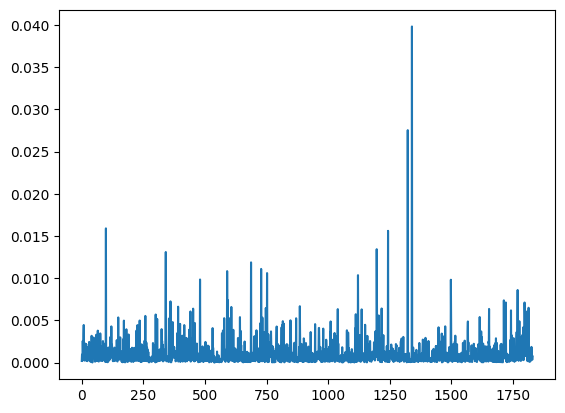

In [21]:
plt.plot(scores)

# Model for timeseries data

In [23]:
from deepod.models.time_series import TimesNet
clf = TimesNet(device=None)
clf.fit(X)
scores = clf.decision_function(X)

epoch  1, training loss: 0.989508, time: 71.3s
epoch  2, training loss: 0.901019, time: 70.6s
epoch  3, training loss: 0.691227, time: 78.9s
epoch  4, training loss: 0.680557, time: 88.7s
epoch  5, training loss: 0.560068, time: 95.6s
epoch  6, training loss: 0.563404, time: 95.4s
epoch  7, training loss: 0.487279, time: 96.2s
epoch  8, training loss: 0.461194, time: 95.6s
epoch  9, training loss: 0.463147, time: 96.1s
epoch 10, training loss: 0.473248, time: 95.9s


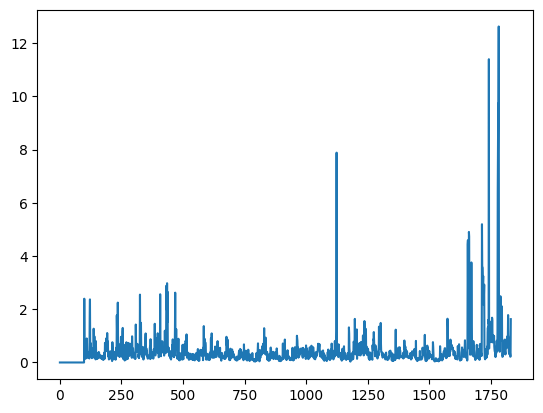

In [24]:
plt.plot(scores)

In [25]:
from deepod.metrics import ts_metrics
from deepod.metrics import point_adjustment # execute point adjustment for time series ad
eval_metrics = ts_metrics(y, scores)
adj_eval_metrics = ts_metrics(y, point_adjustment(y, scores))
print(eval_metrics)
print(adj_eval_metrics)

(0.7765586377368856, 0.3896573686043172, 0.4196135370223078, 0.4031413612565445, 0.4375)
(1.0, 1.0, 0.9999950000249999, 1.0, 1.0)


In [26]:
from deepod.models.time_series import TranAD
clf = TranAD(device=None)
clf.fit(X)
scores = clf.decision_function(X)

Epoch 1,	 L1 = 1.0385258793830872
Epoch 2,	 L1 = 1.0296148274626051
Epoch 3,	 L1 = 0.916243280683245
Epoch 4,	 L1 = 0.8829407691955566
Epoch 5,	 L1 = 0.8665252923965454


In [27]:
eval_metrics = ts_metrics(y, scores)
adj_eval_metrics = ts_metrics(y, point_adjustment(y, scores))
print(eval_metrics)
print(adj_eval_metrics)

(0.9525473770942049, 0.6586196052325077, 0.6788462077274473, 0.6280193236714976, 0.7386363636363636)
(1.0, 1.0, 0.9999950000249999, 1.0, 1.0)
